#### Libraries

In [110]:
                                    ####### VISUALIZATION TOOLS #######

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colormaps as cm
import matplotlib.patches as mpatches 
from matplotlib.patches import Patch

import seaborn as sns
import warnings #ignore the errors for newer version of distplot
warnings.filterwarnings("ignore", category=UserWarning) 

import plotly.express as px
import plotly.graph_objects as go

import folium
from folium import plugins
from folium import Choropleth


                                    ####### VECTORS AND MATRICES #######

import numpy as np
import pandas as pd

                                    ####### SCIPY #######

from scipy import stats

                                    ####### SCIKIT-LEARN #######

from sklearn.preprocessing import StandardScaler #for Z-score normalization
from sklearn.preprocessing import normalize  #normalization along rows
from sklearn.preprocessing import PolynomialFeatures #to do a polynomial regression
from sklearn.preprocessing import OneHotEncoder #one-hot encoding adding columns
from sklearn.preprocessing import LabelEncoder #from strings to label
from sklearn.preprocessing import label_binarize #one-hot encoding of vectors

from sklearn.linear_model import LinearRegression #for linear (parameter) regression
from sklearn.linear_model import Ridge #for Ridge regression
from sklearn.linear_model import Lasso #for Lasso regression
from sklearn.linear_model import LogisticRegression #logistic regression 


from sklearn.tree import DecisionTreeClassifier #for tree classifier (not regression)
from sklearn.tree import DecisionTreeRegressor #for regression tree
from sklearn.tree import plot_tree #to plot the tree

from sklearn.svm import LinearSVC #supported vector machine
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.cluster import KMeans #Kmeans

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error #for MSE error
from sklearn.metrics import r2_score #for the R^2 score on muliple variable regression
from sklearn.metrics import log_loss # for the cross-correlation entropy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score # k-means accuracies
from sklearn.metrics import explained_variance_score #for explained variance

from sklearn.pipeline import Pipeline #to use pipelines

from sklearn.model_selection import train_test_split #train-test splitting
from sklearn.model_selection import cross_val_score #K-fold validation
from sklearn.model_selection import cross_val_predict #K-fold validation
from sklearn.model_selection import StratifiedKFold #K-fold validation
from sklearn.model_selection import GridSearchCV #for GridSearchCV


from sklearn.multiclass import OneVsOneClassifier #multiclass classification using binary classification instead

from sklearn.utils.class_weight import compute_sample_weight

from sklearn.decomposition import PCA

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

import umap.umap_ as UMAP 
from sklearn.manifold import TSNE


from sklearn.datasets import make_blobs 
from sklearn.datasets import make_classification

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
from sklearn.datasets import load_breast_cancer
cancers = load_breast_cancer()
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn.datasets import fetch_california_housing
cal_housing = fetch_california_housing


                                    ####### ENSAMBLE METHODS #######

from xgboost import XGBRegressor

                                    ####### PYTORCH #######
import torch
from torch import nn #train neural networks
from torch import optim #optimizer
from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset
import torchvision.models as models

                                   ####### IMAGES #######
                                   
import os
from PIL import Image # converting images into arrays
from PIL import ImageFile

from copy import copy
import operator
import sys

                                   ####### SCRAPING #######
import urllib




import gymnasium
from gymnasium.wrappers import RecordVideo
import glob, io, base64
from IPython.display import HTML
from IPython import display as ipythondisplay
import random
import wordcloud
from wordcloud import WordCloud, STOPWORDS

from collections import namedtuple, deque

import time #time of running

# 1) Standard regression

##### Database for this notebook

In [57]:
url=file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df=pd.read_csv(url)
print('In this database there are m =',df.shape[0],'data with D =',df.shape[1],'features.')

def NaN_value_finder(dataframe):
    dataframe=dataframe.replace('?',np.nan)
    missing_data = dataframe.isnull()
    missing_dict=dict()
    missing_index=list()
    for column in missing_data.columns.values.tolist():
        for i,value in enumerate(missing_data[column]):
            if missing_data[column][i]==True:
                missing_index.append(i)
                missing_dict[column]=missing_dict.get(column,0)+1
    for i,value in enumerate(missing_dict):
        print('There are', missing_dict[value], 'null values in the column',value)
    return missing_dict, missing_index

def Z_score_normalization(df, type):
    for i, value in enumerate(df.columns):
        if df[value].dtype.name == type:
            df[value] = (df[value] - df[value].mean()) / df[value].std()
            # df.rename(columns={value: 'Z-normalized ' + value}, inplace=True)
    
Z_score_normalization(df,'float64')


NaN_value_finder(df)

df.head(2)

In this database there are m = 201 data with D = 29 features.
There are 4 null values in the column stroke
There are 1 null values in the column horsepower-binned


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,-1.68091,-0.438315,...,-0.290709,0.203247,-0.246103,21,27,0.036224,0.491727,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,-1.68091,-0.438315,...,-0.290709,0.203247,-0.246103,21,27,0.414350,0.491727,Medium,0,1


To see the typ of correlation between the variables, we can do a scatter plot: if the correlation is linear we can use a linear fit:

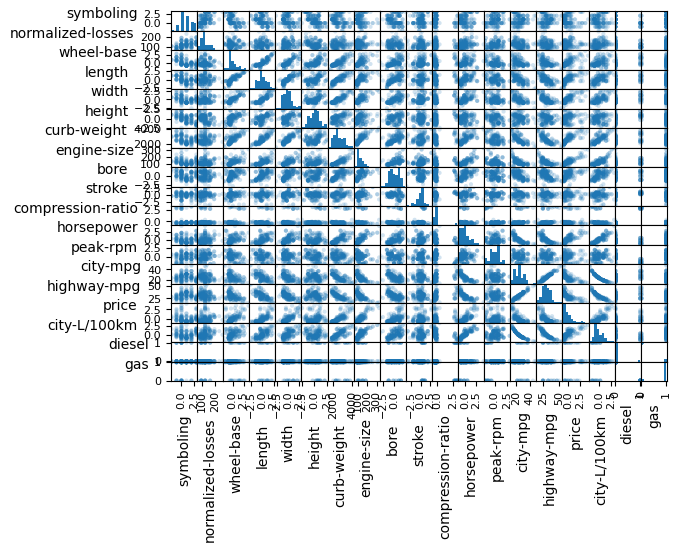

In [58]:
axes = pd.plotting.scatter_matrix(df._get_numeric_data(), alpha=0.2)
# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

## LINEAR (single and multiple) variable, linear regression with R^2/MSE

We try to make a (SINGLE) linear regression using as data {x;y}={'highway-mpg','price'} and then a (MULTIPLE) linear regression using {(x1,x2,x3,x4),y}={('horsepower','curb-weight','engine-size','highway-mpg'),'price'}. Finally we do the in-sample evaluation, or the error test on the training test.

### Single variable

It is important for scikit-learn that the X tensor that we pass to the **.fit(X,y)** model should be of the form **X=(number_of_observations=m, number_of_features=D)**. For the single variable regression, it must be (m,1). If it is of the form (m), we must use **X.reshape(-1, 1)**.

In [59]:
lmsingle = LinearRegression() #lm is for linear model, in the parameters
target='price'

single=['highway-mpg']
x = df[single] #fundamental to insert two [[]]; the second parenthesis is in the 'single' variable defined in the previous line
y = df[target] #pandas series

from sklearn.linear_model import LinearRegression #for linear (parameter) regression
lmsingle.fit(x,y)
yhat=lmsingle.predict(x) #numpy array

from sklearn.metrics import mean_squared_error #for MSE error
from sklearn.metrics import r2_score #for the R^2 score on muliple variable regression                  
print('(',target,')hat=',lmsingle.intercept_,'+',lmsingle.coef_[0],'*',single[0],'\n')
print('the MSE is',mean_squared_error(y,yhat),'and the R^2 error is',lmsingle.score(x,y),'or',r2_score(y,yhat))

( price )hat= 3.173016987646062 + -0.10340084541453606 * highway-mpg 

the MSE is 0.500904290115505 and the R^2 error is 0.4965911884339175 or 0.4965911884339175


The MSE is computed in the standard way:

In [ ]:
((y-yhat)**2).mean()

np.float64(0.500904290115505)

Linear regression by hand:

In [ ]:
xvector=x['highway-mpg']
yvector=y

def covariance(vecx,vecy):
    return (np.dot(vecx,vecy)-(vecx.mean()*vecy.mean())*(vecy.size))/(vecy.size)

#test: covariance(xvector,xvector)-np.var(xvector)

# the best values for the fit are (a,b) in the following yhat=a*x+b

a=covariance(xvector,yvector)/covariance(xvector,xvector)
b=yvector.mean()-a*xvector.mean()

print('(',target,')hat=',b,'+',a,'*',single[0],'\n')

( price )hat= 3.1730169876460717 + -0.10340084541453638 * highway-mpg 



Now we visualize if the fits are good or not. If the points are near to the line in a regression plot we are happy, and also we are happy if the data are distribuited uniformly around the x-axis in a residual plot, because it means that the variance is constant.

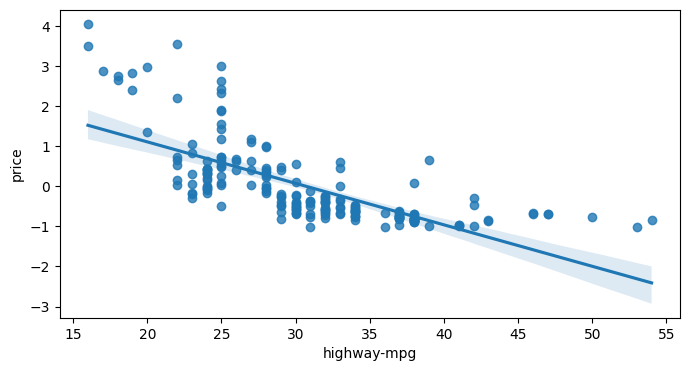

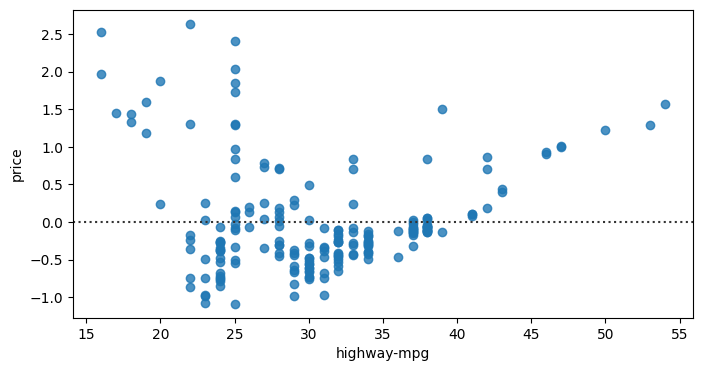

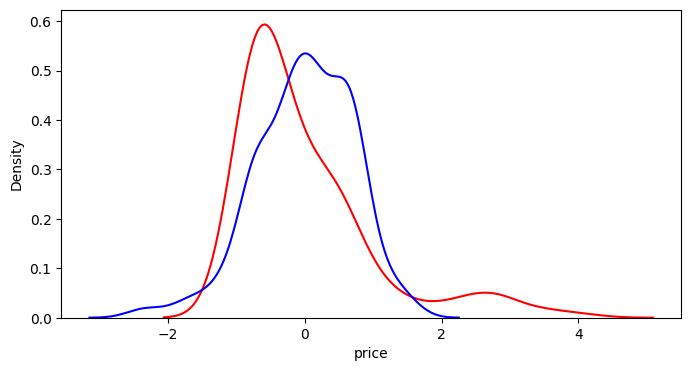

In [ ]:
plt.figure(figsize=(8, 4))
sns.regplot(x=single[0],y=target,data=df)
plt.show()
plt.close()
###########
plt.figure(figsize=(8, 4))
sns.residplot(data=df,x=single[0],y=target)
plt.show()
plt.close()
###########
plt.figure(figsize=(8, 4))
ax1=sns.distplot(y,hist=False,color='r',label='Actual Values')
sns.distplot(yhat,hist=False,color='b',label='Predicted Values',ax=ax1)
plt.show()
plt.close()

Let's see also Ridge and Lasso models:

In [72]:
lm=LinearRegression()
lm.fit(x,y)
yhat=lm.predict(x) #numpy array
print('the MSE is',mean_squared_error(y,yhat),'and the R^2 error is',lm.score(x,y))

rm=Ridge(alpha=1)
rm.fit(x,y)
yhat=rm.predict(x) #numpy array
print('the MSE is',mean_squared_error(y,yhat),'and the R^2 error is',rm.score(x,y))

laxm = Lasso(alpha=1)
laxm.fit(x,y)
yhat=laxm.predict(x) #numpy array
print('the MSE is',mean_squared_error(y,yhat),'and the R^2 error is',laxm.score(x,y))

the MSE is 0.500904290115505 and the R^2 error is 0.4965911884339175
the MSE is 0.5009042958405354 and the R^2 error is 0.4965911826802619
the MSE is 0.5225421962178862 and the R^2 error is 0.4748450928010244


### Multiple variables 

In [ ]:

lmmultiple = LinearRegression() #lm is for linear model, in the parameters

multiple=['horsepower','curb-weight','engine-size','highway-mpg']
target='price'
X = df[multiple] #fundamental to insert two [[]]
y = df[target]

from sklearn.linear_model import LinearRegression #for linear (parameter) regression
lmmultiple.fit(X,y)
yhat=lmmultiple.predict(X)

from sklearn.metrics import mean_squared_error #for MSE error
from sklearn.metrics import r2_score #for the R^2 score on muliple variable regression
print('(',target,')hat=',lmmultiple.intercept_,'+',lmmultiple.coef_[0],'*',multiple[0],'+',lmmultiple.coef_[1],'*',multiple[1],'+',lmmultiple.coef_[2],'*',multiple[2],'+',lmmultiple.coef_[3],'*',multiple[3],'\n')
print('the MSE is',mean_squared_error(y,yhat),'and the R^2 error is',lmmultiple.score(X,y),'or',r2_score(y,yhat))

( price )hat= -2.9548008001649 + 0.25152752190367755 * horsepower + 0.000592382244221351 * curb-weight + 0.010259164868294283 * engine-size + 0.004537207475694327 * highway-mpg 

the MSE is 0.18969524312662117 and the R^2 error is 0.8093562806577457 or 0.8093562806577457


Now we visualize if the fits are good or not. If the points are near to the line in a regression plot we are happy, and also we are happy if the data are distribuited uniformly around the x-axis in a residual plot, because it means that the variance is constant.

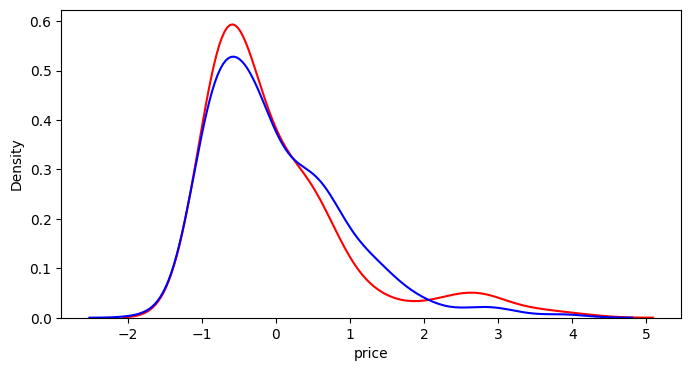

In [ ]:
plt.figure(figsize=(8, 4))
ax1=sns.distplot(y,hist=False,color='r',label='Actual Values')
ax2=sns.distplot(yhat,hist=False,color='b',label='Predicted Values',ax=ax1)
plt.show()
plt.close()

## POLYNOMIAL (single and multiple) variable, linear regression with R^2/MSE

Here we do a polynomial fit. Notice that basically we are using an activation funcion which transform the linear function into a polynomial. Then we have to do a linear fit on the transformed object!

### multi variable

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def function_to_print_multivariate_polynomial(bias, coefficients, feature_names):
    print(f'Bias (intercept) = {bias}')
    print('Polynomial regression model:\n')
    for coef, name in zip(coefficients, feature_names):
        print(f'{coef:+.4f} * {name}')

multiple=['horsepower','curb-weight','engine-size','highway-mpg']
target='price'
X = df[multiple] #fundamental to insert two [[]]
y = df[target]

pm=PolynomialFeatures(degree=2,include_bias=True) #this is a polynomial transformer which includes up to power 2 in each variable (and also products): 1,x1,x2,x1^2,x1x2, x2^2 .......
X_poly=pm.fit_transform(X) #numpy array containing the coefficients of the polynomial above

lm=LinearRegression()
lm.fit(X_poly,y)
yhat=lm.predict(X_poly)

feature_names = pm.get_feature_names_out(multiple)
function_to_print_multivariate_polynomial(lm.intercept_, lm.coef_, feature_names)

print('\nthe MSE is',mean_squared_error(y,yhat),'or',((y-yhat)**2).mean(),'and the R^2 error is',lm.score(X_poly,y),'or',r2_score(y,yhat),'\n')

Bias (intercept) = 2.8864890344918903
Polynomial regression model:

+0.0000 * 1
+3.4341 * horsepower
-0.0012 * curb-weight
-0.0302 * engine-size
-0.0050 * highway-mpg
+0.2977 * horsepower^2
-0.0009 * horsepower curb-weight
-0.0061 * horsepower engine-size
-0.0101 * horsepower highway-mpg
+0.0000 * curb-weight^2
+0.0000 * curb-weight engine-size
-0.0000 * curb-weight highway-mpg
+0.0000 * engine-size^2
+0.0000 * engine-size highway-mpg
+0.0006 * highway-mpg^2

the MSE is 0.15290129653087287 or 0.15290129653087287 and the R^2 error is 0.8463341969864728 or 0.8463341969864728 



### (only for!) single variable

[-1.95875839e-04  2.57647662e-02 -1.12814374e+00  1.56933967e+01] 

             3           2
-0.0001959 x + 0.02576 x - 1.128 x + 15.69 

 [ 0.16060618  0.16060618  0.3359277  -0.25127352]


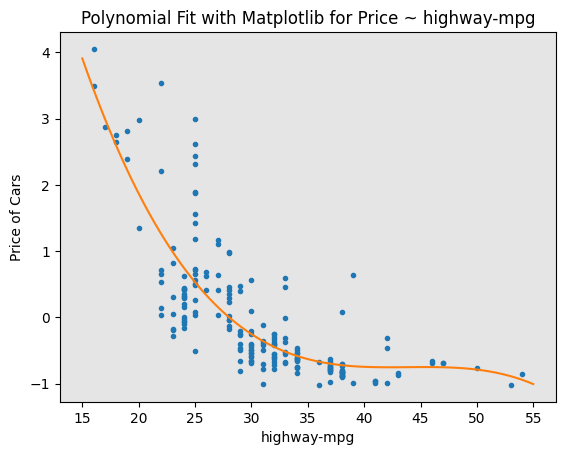

In [ ]:
#function to plot fit of polynomial with single variable
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ highway-mpg')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

x = df['highway-mpg'] #one bracket!
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
yhat=p(x)
print(f,'\n\n',p,'\n\n',yhat[0:4])

PlotPolly(p, x, y, 'highway-mpg')

## Using Pipelines

A pipeline is a way to do what we have done above in a single step. Let's try a linear multiple variable fit and compare with the results obtained before:

In [ ]:
from sklearn.pipeline import Pipeline 

multiple=['horsepower','curb-weight','engine-size','highway-mpg']
target='price'
X = df[multiple] #fundamental to insert two [[]]
y = df[target]

#input=[('polynomial',PolynomialFeatures(degree=1)),('scale',StandardScaler()),('Model',LinearRegression())]
input=[('polynomial',PolynomialFeatures(degree=1)),
       ('Model',LinearRegression(fit_intercept=False))]

pipe=Pipeline(input)
pipe.fit(X,y)
yhat=pipe.predict(X)


print('(',target,')hat=',pipe.named_steps['Model'].intercept_,'+',pipe.named_steps['Model'].coef_[0],'*',multiple[0],'+',pipe.named_steps['Model'].coef_[1],'*',multiple[1],'+',pipe.named_steps['Model'].coef_[2],'*',multiple[2],'+',pipe.named_steps['Model'].coef_[3],'*',multiple[3],'\n')


print('the MSE is',mean_squared_error(y,yhat),'\n')
print('the R^2 error is',lmmultiple.score(X,y),'or',r2_score(y,yhat),'or',pipe.score(X,y),'\n')

( price )hat= 0.0 + -2.9548008001649104 * horsepower + 0.25152752190367805 * curb-weight + 0.0005923822442213756 * engine-size + 0.010259164868294339 * highway-mpg 

the MSE is 0.18969524312662117 

the R^2 error is 0.8093562806577457 or 0.8093562806577457 or 0.8093562806577457 



# 2) Standard classification: logistic and multiclass

## Logistic clasification

Since the output of the various **.fit** methods are np arrays, and since then we have to compare yhat and y_train we must have that **yhat,y_test,y_train are of the same type: np objects**.

In [22]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')


multiple=['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']
target=['churn']

scale=StandardScaler()

X = churn_df[multiple]
scale.fit(X)
X_scaled=scale.transform(X) #this is automatically a np array (200,7)

y = np.asarray(churn_df[target]) #now this is np (200,1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)


(200, 7)

It is important to compute the loss using the probabilities, and not the assigned classes which depends on the threshold. This two lines are equivalent:
- threshold = 0.5, yhat_custom = (yhat_prob[:, 1] >= threshold).astype(int)
- yhat=lr.predict(X_test) 

Since there is not an analytic normal equation that solves the minimization problem, we have to use a numeric algorithm. The standard is 'lbfgs', but we can also use:
| **Solver**       | **Regularization**         | **Use Case**                            | **Multiclass Support** | **Notes**                                                                 |
|------------------|----------------------------|-----------------------------------------|------------------------|---------------------------------------------------------------------------|
| `liblinear`      | L1, L2                     | Small datasets, binary classification   | OvR only               | Uses coordinate descent; not suitable for large datasets                 |
| `lbfgs` *(default)* | L2 (or none)             | Medium datasets, multinomial logistic regression | Multinomial        | Quasi-Newton method; robust and efficient but can use more memory        |
| `newton-cg`      | L2 (or none)               | Dense datasets, multiclass problems     | Multinomial            | Uses Newton's method; requires Hessian computation, can be memory-heavy  |
| `sag`            | L2                         | Large datasets with many samples        | Multinomial            | Stochastic Average Gradient; faster for large datasets, only L2 support  |
| `saga`           | L1, L2, Elastic Net        | Large or sparse datasets, L1 regularization | Multinomial        | Variant of SAG; supports L1 and Elastic Net; good for high-dimensional data |



In [34]:
lr=LogisticRegression() 
lr.fit(X_train,y_train)

yhat_prob=lr.predict_proba(X_test) #np tensor, the first column is the probability to belonging to the class 0; threshold=0.5
print(yhat_prob[:5],'\n')

threshold = 0.5
yhat_custom = (yhat_prob[:, 1] >= threshold).astype(int)
print(yhat_custom[:5],'\n')

yhat=lr.predict(X_test) #np array of the resulting class, (40,)
#yhat=lr.predict(X_test).reshape(-1,1) #np array of the resulting class, (40,1)
print(yhat[:5],'\n')

print('The binary cross-entropy is',log_loss(y_test, yhat_prob))

[[0.74643946 0.25356054]
 [0.92667894 0.07332106]
 [0.83442627 0.16557373]
 [0.94600618 0.05399382]
 [0.84325532 0.15674468]] 

[0 0 0 0 0] 

[0 0 0 0 0] 

The binary cross-entropy is 0.6257718410257236


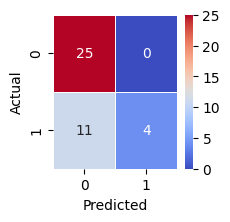

Accuracy on test set: 0.725


In [35]:
conf_matrix=confusion_matrix(y_test,yhat_custom)

plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5) #d to print integers in the matrix
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.close()

print('Accuracy on test set:', accuracy_score(y_test,yhat_custom))

Using '0' as positive and '1' and negative:

- precision = $\pi=\frac{t_p}{\hat{P}}=\frac{25}{25+11}\simeq = 0.69$ 
- recall = $\rho=\frac{t_p}{{P}}=\frac{25}{25}=1$ 
- F1= $\frac{2}{\pi^{-1}+\rho^{-1}}=0.816\simeq 0.82$
- accuracy = $A=\frac{t_p+t_n}{P+N}=\frac{29}{25+15}=0.725$

In [27]:
print(classification_report(y_test,yhat_custom))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       1.00      0.27      0.42        15

    accuracy                           0.72        40
   macro avg       0.85      0.63      0.62        40
weighted avg       0.81      0.72      0.67        40



## Multiclass classification

In [115]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
old_df = pd.read_csv(file_path)

print(old_df.shape)
target='NObeyesdad'

# sns.countplot(y=target, data=df)
# plt.title('Distribution of Obesity Levels')
# plt.show() #to see that the classes are balanced

def Z_score_normalization(old_df, type):
    continuous_columns = old_df.select_dtypes(include=['float64']).columns.tolist() #list of the columns to be normalized
    scale=StandardScaler()
    scale.fit(old_df[continuous_columns])
    scaled_features=scale.transform(old_df[continuous_columns])
    scaled_df=pd.DataFrame(scaled_features, columns=continuous_columns)

    df=pd.concat([old_df.drop(columns=continuous_columns),scaled_df],axis=1)
    
    # for i, value in enumerate(df.columns):
    #     if df[value].dtype.name == type:
    #         df.rename(columns={value: 'Z-normalized ' + value}, inplace=True)
    
    means_ = scale.mean_
    std_devs_ = np.sqrt(scale.var_)
    #coef_original = coef_ / std_devs_
    #intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

    return df

df=Z_score_normalization(old_df,'float64')

df

(2111, 17)


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991


In [117]:
def binary_multi(df):
    binary=[]
    multi=[]

    for i,column in enumerate(df.columns):
        if df[column].nunique()== 2 and (df[column].dtype=='object' or df[column].dtype=='category' or df[column].dtype=='bool'):
            binary.append(column)
        if df[column].nunique()> 2 and df[column].nunique()<= 40 and (df[column].dtype=='object' or df[column].dtype=='category'):
            multi.append(column)

    print('Binary features are:',binary,';')
    print('Multiclass features are:',multi,'.\n')

    for i,column in enumerate(multi):
        print(column,'has',df[column].nunique(),'classes')

binary_multi(X)

binary_multi(df)


Binary features are: ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC'] ;
Multiclass features are: ['CAEC', 'CALC', 'MTRANS', 'NObeyesdad'] .

CAEC has 4 classes
CALC has 4 classes
MTRANS has 5 classes
NObeyesdad has 7 classes


### One-hot encoding, X-y separation, train-test split

First we need to do one-hot encoding. The target is 'NObeyesdad', whilst all other variables (features) will be the data. Since 
- ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC'] are binary;
- ['CAEC', 'CALC', 'MTRANS', 'NObeyesdad'] are multiclass with (4,4,5,7) classes respectively,

there are 9 categorical classes, and then 17-9=8 float. Excluding the target, that we encode later, we will have 8+1(target)+5(binary)+3(multi_1)+3(multi_2)+4(multi_3)=24 columns. Notice that this counting is correct only if there is the 'first' in **encoder = OneHotEncoder(sparse_output=False,drop='first')**, because for which the 4 classes in multi_1 will give 3 columns instead of 4.

In [195]:
target='NObeyesdad'

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('NObeyesdad')

encoder = OneHotEncoder(sparse_output=False,drop='first')
encoder.fit(df[categorical_columns])
encoded_features=pd.DataFrame(encoder.transform(df[categorical_columns]),columns=encoder.get_feature_names_out(categorical_columns))
encoded_df=pd.concat([df.drop(columns=categorical_columns),encoded_features],axis=1) 

encoded_df.head(4) #this df has all the float variables, the columns with one-hot encoding, and the target with as in the original df


,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Now we encode the target variable, assigning numerical integers to each possible class (from 1 to 7):

In [178]:
encoded_df['NObeyesdad_code'] = encoded_df['NObeyesdad'].astype('category').cat.codes #creates a new column
label_mapping = dict(enumerate(encoded_df['NObeyesdad'].astype('category').cat.categories)) 

encoded_df=encoded_df.drop(columns=['NObeyesdad'],axis=1) #drops the useless column

print(label_mapping)
encoded_df.head(4)


{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_code
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5


There is another way to encode the strings in labels, without the use of **.astype('category').cat.codes**. We can use **LabelEncoder()**:

In [196]:
le=LabelEncoder()

le.fit(encoded_df[target])
encoded_df['NObeyesdad_code'] = le.transform(encoded_df[target]) 

encoded_df=encoded_df.drop(columns=['NObeyesdad'],axis=1) #drops the useless column

print(le.inverse_transform(encoded_df['NObeyesdad_code']) )
encoded_df.head()


['Normal_Weight' 'Normal_Weight' 'Normal_Weight' ... 'Obesity_Type_III'
 'Obesity_Type_III' 'Obesity_Type_III']


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_code
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6


Now we are ready to create X and y and split in train and test! 

In [ ]:
X = encoded_df.drop('NObeyesdad_code', axis=1)
y = encoded_df['NObeyesdad_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

### One-vs-All classifier

In the One-vs-All approach:

- The algorithm trains a single binary classifier for each class.
- Each classifier learns to distinguish a single class from all the others combined.
- If there are k classes, k classifiers are trained.
- During prediction, the algorithm evaluates all classifiers on each input, and selects the class with the highest confidence score as the predicted class.

**Advantages**:
* Simpler and more efficient in terms of the number of classifiers (k)
* Easier to implement for algorithms that naturally provide confidence scores (e.g., logistic regression, SVM).

**Disadvantages**:
* Classifiers may struggle with class imbalance since each binary classifier must distinguish between one class and the rest.
* Requires the classifier to perform well even with highly imbalanced datasets, as the "all" group typically contains more samples than the "one" class.


In [166]:
OvA_model = LogisticRegression(multi_class='ovr', max_iter=1000) #ovr is one-vs-rest
OvA_model.fit(X_train, y_train)

yhat_test_OvA = OvA_model.predict(X_test)

print('Accuracy:', 100*accuracy_score(y_test, yhat_test_OvA),'%')

Accuracy: 76.12293144208037 %


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


We can also plot the importance of the features on the result:

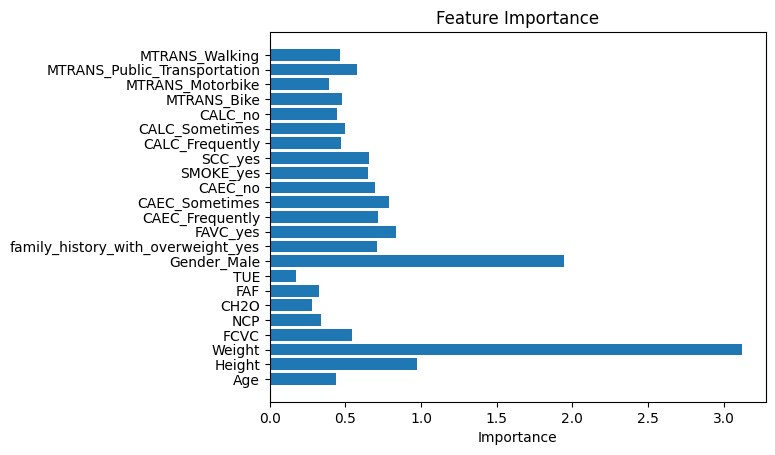

In [168]:
feature_importance = np.mean(np.abs(OvA_model.coef_), axis=0)
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

### One-vs-One classifier

In the One-vs-One approach:
- The algorithm trains a binary classifier for every pair of classes in the dataset.
- If there are k classes, this results in $k(k-1)/2$ classifiers.
- Each classifier is trained to distinguish between two specific classes, ignoring the rest.
- During prediction, all classifiers are used, and a "voting" mechanism decides the final class by selecting the class that wins the majority of pairwise comparisons.

**Advantages**:
* Suitable for algorithms that are computationally expensive to train on many samples because each binary classifier deals with a smaller dataset (only samples from two classes).
* Can be more accurate in some cases since classifiers focus on distinguishing between two specific classes at a time.

**Disadvantages**:
* Computationally expensive for datasets with a large number of classes due to the large number of classifiers required.
* May lead to ambiguous predictions if voting results in a tie.


In [167]:
OvO_model = OneVsOneClassifier(LogisticRegression(max_iter=1000))
OvO_model.fit(X_train, y_train)

yhat_test_OvO = OvO_model.predict(X_test)

print('Accuracy:', 100*accuracy_score(y_test, yhat_test_OvO),'%')

Accuracy: 92.19858156028369 %


Features importance:

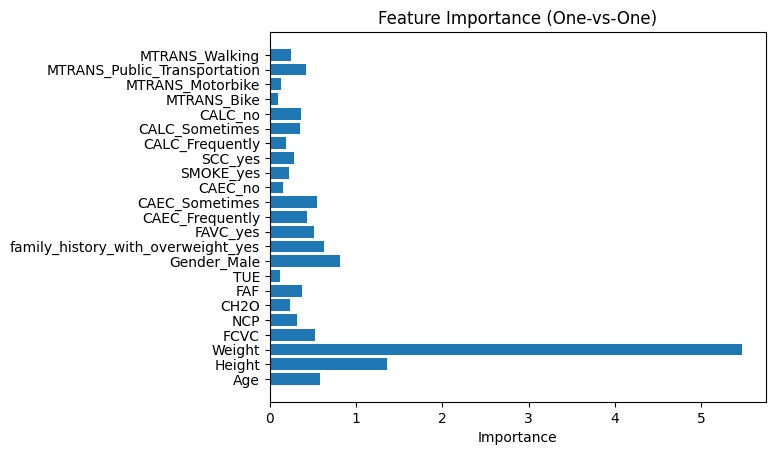

In [169]:
coefs = np.array([est.coef_[0] for est in OvO_model.estimators_]) # Collect all coefficients from each underlying binary classifier

feature_importance = np.mean(np.abs(coefs), axis=0) # Now take the mean across all those classifiers

# Plot feature importance
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance (One-vs-One)")
plt.xlabel("Importance")
plt.show()

# 3) Trees

## Decision trees

In [312]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
df = pd.read_csv(path)

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [313]:
binary=[]
multi=[]

for i,column in enumerate(df.columns):
    if df[column].nunique()== 2:
        binary.append(column)
    if df[column].nunique()> 2 and df[column].nunique()<= 40:
        multi.append(column)

print('Binary features are:',binary,';')
print('Multiclass features are:',multi,'.\n')

for i,column in enumerate(multi):
    print(column,'has',df[column].nunique(),'classes')

Binary features are: ['Sex', 'Cholesterol'] ;
Multiclass features are: ['BP', 'Drug'] .

BP has 3 classes
Drug has 5 classes


### encoding and train-test

In [314]:
categorical_columns=binary+multi

label_encoder = LabelEncoder()

for i,categorical_column in enumerate(categorical_columns):
    df[categorical_column+'_code'] = label_encoder.fit_transform(df[categorical_column])
    df=df.drop(columns=categorical_column,axis=1)

df.head()


,Age,Na_to_K,Sex_code,Cholesterol_code,BP_code,Drug_code
0,23,25.355,0,0,0,4
1,47,13.093,1,0,1,2
2,47,10.114,1,0,1,2
3,28,7.798,0,0,2,3
4,61,18.043,0,0,1,4


Age                -0.004828
Na_to_K             0.589120
Sex_code           -0.098573
Cholesterol_code    0.055629
BP_code             0.372868
Drug_code           1.000000
Name: Drug_code, dtype: float64


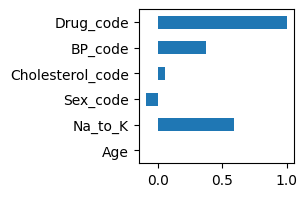

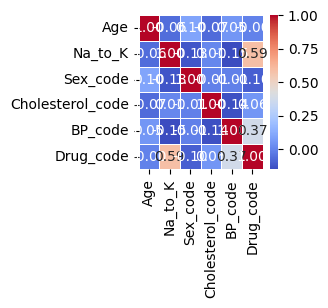

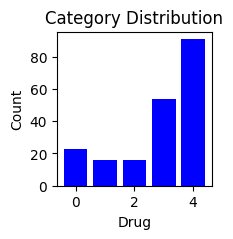

In [315]:
correlations=df.corr()['Drug_code']
print(correlations)

correlations.plot(kind='barh', figsize=(2, 2))
plt.show()
plt.close()

correlation_matrix = df.corr()
plt.figure(figsize=(2, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()
plt.close()

category_counts = df['Drug_code'].value_counts()
# Plot the count plot
plt.figure(figsize=(2, 2))
plt.bar(category_counts.index, category_counts.values, color='blue')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=0)  # Rotate labels for better readability if needed
plt.show()
plt.close()

In [316]:
y = df['Drug_code']
X = df.drop(['Drug_code'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

### tree

If there are imbalanced classes, we can use **w_train = compute_sample_weight('balanced', y_train)**, so that it is assigned a weight to each class, accounting for the imbalance:

In [317]:
w_train = compute_sample_weight('balanced', y_train) #to pass to the .fit method

drugTree = DecisionTreeClassifier(criterion='entropy', max_depth = 4) # {'log_loss', 'gini', 'entropy'}

drugTree.fit(X_train,y_train, sample_weight=w_train)

yhat_test=drugTree.predict(X_test)

print("Decision Trees's Accuracy: ", accuracy_score(y_test, yhat_test))

Decision Trees's Accuracy:  0.9833333333333333


We can also use the AuC score to compute the accuracy:

In [318]:


y_test_bin

array([[0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0,

In [319]:
classes = np.unique(y_test)

y_test_bin = label_binarize(y_test, classes=classes) # One-hot encoding of y_test

yhat_test_prob=drugTree.predict_proba(X_test)

print('Decision Tree ROC-AUC score :',roc_auc_score(y_test_bin, yhat_test_prob,multi_class='ovr', average='macro'))

Decision Tree ROC-AUC score : 0.990625


In the below three: **x[1]** is the Na_to_K, because it is the first column (starting from 0) of the X set. So we get:

- The decision criterion for Drug Y is ${Na\_to\_K} > 14.627$
- Drug A : $Na\_to\_K <= 14.627,\ BP = High,\ Age \le 50.5$
- Drug B : $Na\_to\_K <= 14.627,\ BP = High,\ Age > 50.5$
- Drug C : $Na\_to\_K <= 14.627,\ BP = Low,\ Cholesterol \le High$
- Drug X : $Na\_to\_K <= 14.627,\ BP = Normal,\ Cholesterol = High$

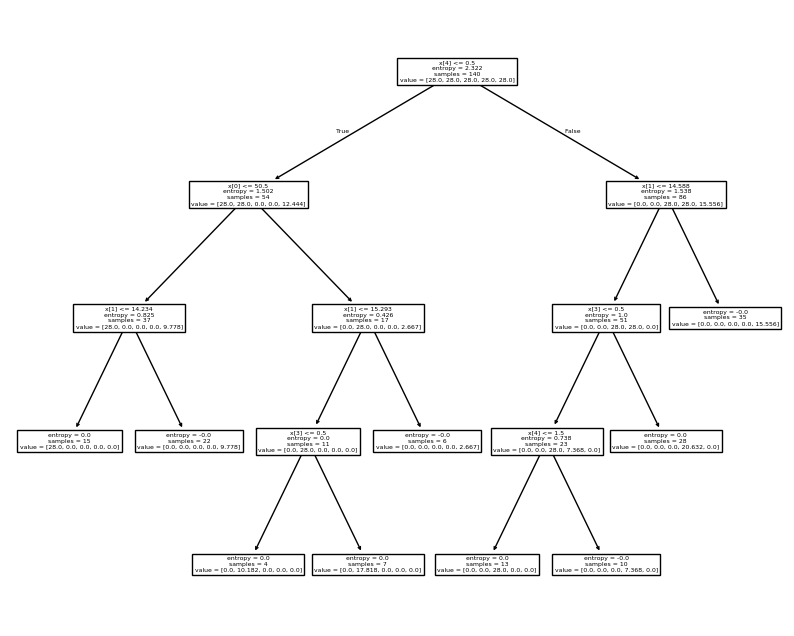

In [320]:
plt.figure(figsize=(10, 8))
plot_tree(drugTree)
plt.show()

## Regression trees

In [278]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
df = pd.read_csv(url)

target='tip_amount'

y = df[[target]].values.astype('float32')

X = df.drop([target], axis=1)
X_norm = pd.DataFrame(normalize(X, axis=1, norm='l1', copy=False),columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)


<Axes: >

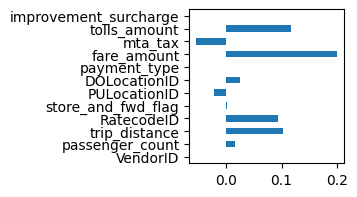

In [279]:
correlation_values = df.corr()['tip_amount'].drop('tip_amount')
correlation_values.plot(kind='barh', figsize=(2, 2))

### tree

Notice that we should have removed the non-coorelated features to have a better result!

In [284]:
tree =  DecisionTreeRegressor(criterion = 'squared_error',
                              max_depth=12, 
                              random_state=35)

tree.fit(X_train, y_train)

yhat_train=tree.predict(X_train)
yhat_test=tree.predict(X_test)

print('MSE on test is',mean_squared_error(y_test, yhat_test),'with a R^2 score of',tree.score(X_test,y_test))

MSE on test is 26.458885658669573 with a R^2 score of -0.04748853286367116


# 4) SVM: Support Vector Machine

- With a larger set of features, SVM performed relatively better in comparison to the Decision Trees.
- Decision Trees benefited from feature selection and performed better.
- SVMs may require higher feature dimensionality to create an efficient decision hyperplane.

In [17]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

df=pd.read_csv(url)

df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])
data_matrix = df.values
X = data_matrix[:, 1:30]
y = data_matrix[:, 30]
X = normalize(X, norm="l1")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The SVM:

In [22]:
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

svm.fit(X_train, y_train)

y_pred_svm = svm.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print('SVM ROC-AUC score:', roc_auc_svm)

y_pred_svm = svm.predict(X_test)
print('SVM accuracy score:', accuracy_score(y_test, y_pred_svm))

SVM ROC-AUC score: 0.9858117118862737
SVM accuracy score: 0.8298397762250858


# 5) KNN: K-Nearest Neighborhoods

Remeber that distance is important, so we have to normalize:

In [24]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

X = df.drop('custcat',axis=1)
y = df['custcat']
X_norm = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

In [25]:
k = 5

knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train,y_train)

yhat_test = knn_model.predict(X_test)
print('Test set Accuracy:', accuracy_score(y_test, yhat_test))

Test set Accuracy: 0.315


Let's explore for different values of k:

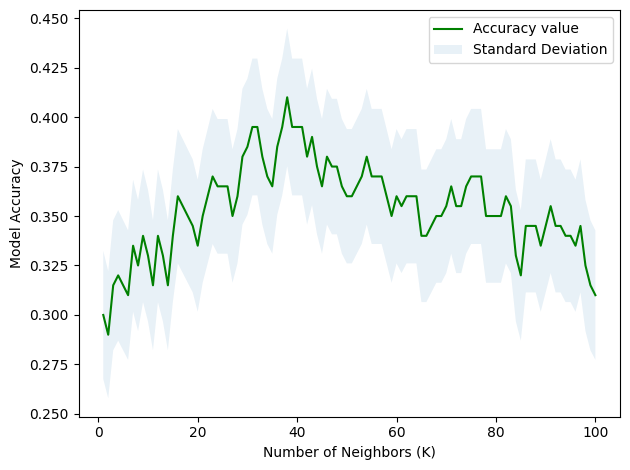

In [350]:
Ks = 100
accuracies = np.zeros((Ks)) #as np list for subsequent plot
std_acc = np.zeros((Ks)) #as np list for subsequent plot
for n in range(1,Ks+1):
    #Train Model and Predict  
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    accuracies[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = (np.std(yhat==y_test)/np.sqrt(yhat.shape[0]))

plt.plot(range(1,Ks+1),accuracies,'g')
plt.fill_between(range(1,Ks+1),accuracies - 1 * std_acc,accuracies + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


When k is small (e.g., k=1), the model is highly sensitive to the individual points in the dataset. The prediction for each point is based on its closest neighbor, which can lead to highly specific and flexible boundaries. This leads to overfitting on the training data, meaning the model will perform very well on the training set, potentially achieving 100% accuracy. However, it may generalize poorly to unseen data.
When k is large, the model starts to take into account more neighbors when making predictions. This has two main consequences:
1. Smoothing of the Decision Boundary: The decision boundary becomes smoother, which means the model is less sensitive to the noise or fluctuations in the training data. 
2. Less Specific Predictions: With a larger k, the model considers more neighbors and therefore makes more generalized predictions, which can lead to fewer instances being classified perfectly.

As a result, the model starts to become less flexible, and its ability to memorize the training data (which can lead to perfect accuracy with small k) is reduced.

The weak performance on the model can be due to multiple reasons.

1. The KNN model relies entirely on the raw feature space at inference time. If the features do no provide clear boundaries between classes, KNN model cannot compensate through optimization or feature transformation;
2. For a high number of weakly correlated features, the number of dimensions increases, the distance between points tend to become more uniform, reducing the discriminative power of KNN;
3. The algorithm treats all features equally when computing distances. Hence, weakly correalted features can introduce noise or irrelevant variations in the feature space making it harder for KNN to find meaningful neighbours.

# 6) Random forest and XGBoost 

In [5]:
data = fetch_california_housing()
X, y = data.data, data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape,y.shape)

(20640, 8) (20640,)


In [10]:
n_estimators=100
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

# Measure training time for Random Forest and XGBoost
start_time_rf = time.time()
rf.fit(X_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf - start_time_rf

start_time_xgb = time.time()
xgb.fit(X_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb

# Measure prediction time for Random Forest and XGBoost
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')

# metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')

Random Forest:  Training Time = 13.427 seconds, Testing time = 0.168 seconds
      XGBoost:  Training Time = 0.232 seconds, Testing time = 0.003 seconds
Random Forest:  MSE = 0.2557, R^2 = 0.8049
      XGBoost:  MSE = 0.2226, R^2 = 0.8301


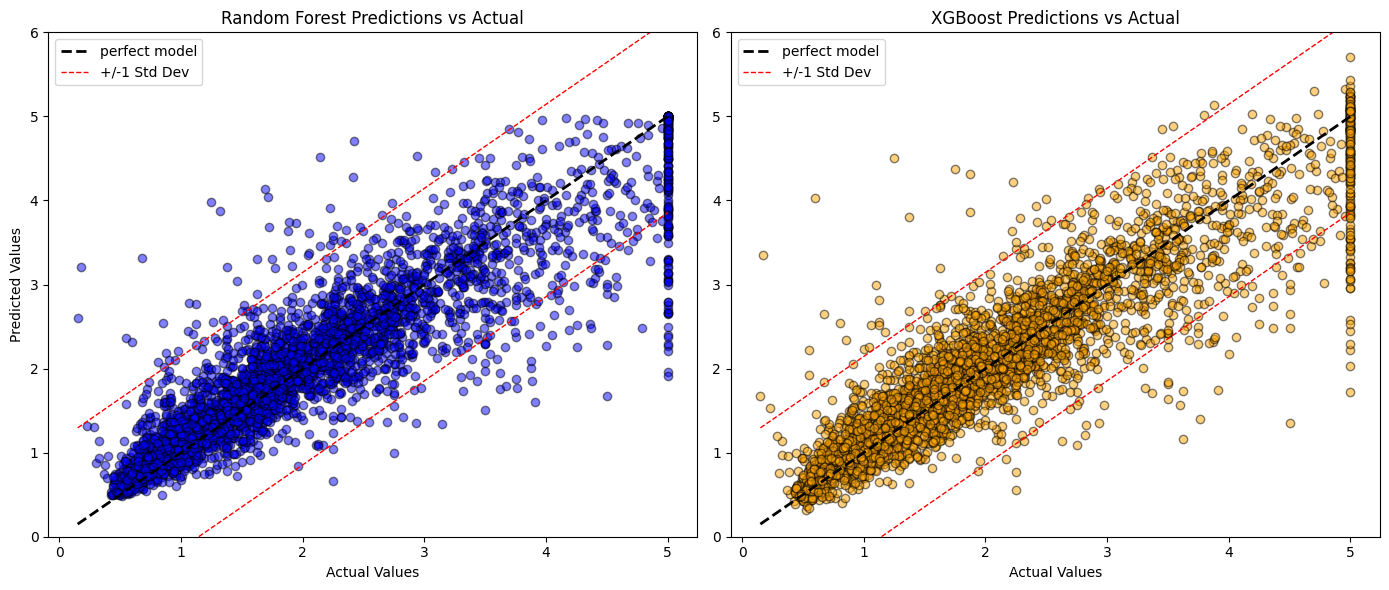

In [12]:
std_y = np.std(y_test)

plt.figure(figsize=(14, 6))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()


# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()

#  7) Clustering

## K-Means

### creating blobs in D=2

We create a dataset with blobs (5000 points) using the **make_blobs** class:

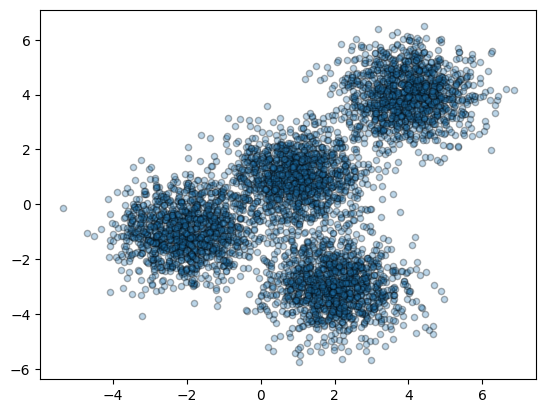

In [45]:
np.random.seed(0)
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], marker='.',alpha=0.3,ec='k',s=80)

The **init** is how to initialize the position of the centroids, **n_init** is the number of times the algorithm runs (at each run, the initializing position will be moved, and the result will be the one of the best run, in terms of the distances). **n_cluster** is the number of cluster to be formed

In [50]:
k=4
k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12,random_state=42)

k_means.fit(X)
k_means_labels = k_means.labels_ # numpy array with 5000 entries, k_means_labels[i] = at which blob the i-th point is assigned to
k_means_cluster_centers = k_means.cluster_centers_ # numpy array with n_clusters entries of the position of the centroids
inertia=k_means.inertia_ #float, compute the average distance between the centers


print(k_means_cluster_centers[0])

print(silhouette_score(X, k_means_labels))

print(davies_bouldin_score(X, k_means_labels))

print(silhouette_samples(X, k_means_labels))

[-2.03556986 -0.99814034]
0.579506962392208
0.5676657375021772
[0.51235299 0.73046936 0.58865826 ... 0.68618565 0.57395589 0.30796973]


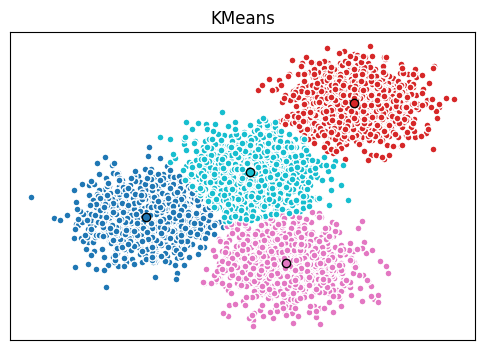

In [38]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

### from a dataset, with D=3

In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
df = df.drop('Address', axis=1)
df = df.dropna()
X = df.values[:,1:] # leaves out `Customer ID`
Clus_dataSet = StandardScaler().fit_transform(X)

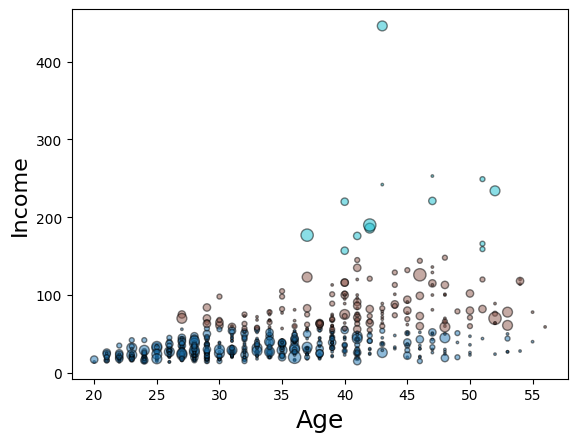

In [63]:
k = 3
k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

df["Clus_kmean"] = labels #new column

area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), cmap='tab10', ec='k',alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

In [64]:
fig = px.scatter_3d(X, x=1, y=0, z=3, opacity=0.7, color=labels.astype(float))

fig.update_traces(marker=dict(size=5, line=dict(width=.25)), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800, scene=dict(
        xaxis=dict(title='Education'),
        yaxis=dict(title='Age'),
        zaxis=dict(title='Income')
    ))  # Remove color bar, resize plot

fig.show()

## (H)DBSCAN

# 8) Dimensional reduction

## PCA

### from a built dataset in D=2

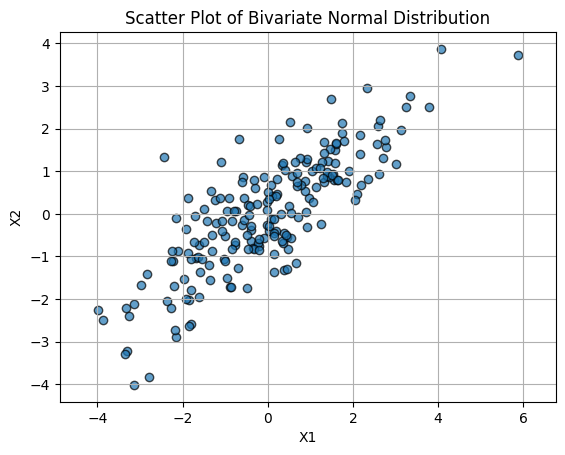

In [52]:
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]
X = np.random.multivariate_normal(mean=mean, cov=cov, size=200)

plt.figure()
plt.scatter(X[:, 0], X[:, 1],  edgecolor='k', alpha=0.7)
plt.title("Scatter Plot of Bivariate Normal Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.show()

The **explained_variance_ratio_** is a numpy vector where $explained\_variance\_ratio\_[i]=\frac{\sigma_i^2}{\sum_i^D\sigma_i^2}$

In [56]:
principal_directions_number=2
pca = PCA(n_components=principal_directions_number)
pca.fit(X)
X_pca = pca.transform(X)

components = pca.components_ # principal_directions_number of eigenvectors, in order of importance

print(pca.explained_variance_ratio_)



[0.9111946 0.0888054]


ValueError: Found input variables with inconsistent numbers of samples: [200, 5000]

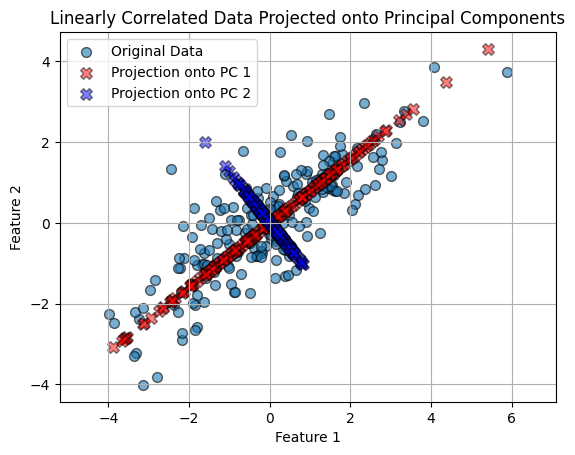

In [74]:
projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])

x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]

# Plot original data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], label='Original Data', ec='k', s=50, alpha=0.6)

# Plot the projections along PC1 and PC2
plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 1')
plt.scatter(x_pc2, y_pc2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components', )
plt.xlabel('Feature 1',)
plt.ylabel('Feature 2',)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

### From a dataset with D=4

In [81]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X.shape

(150, 4)

See the explained variance for all the four dimensions

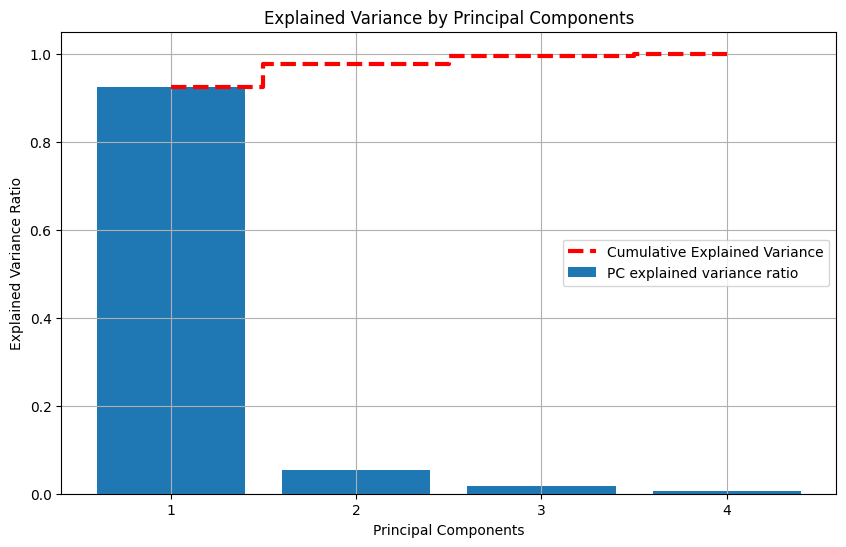

In [86]:
principal_directions_number=4
pca = PCA(n_components=principal_directions_number)
pca.fit(X)
X_pca = pca.transform(X)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio for each component
plt.figure(figsize=(10,6))
plt.bar(x=range(1, len(explained_variance_ratio)+1), height=explained_variance_ratio, alpha=1, align='center', label='PC explained variance ratio' )
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')

# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.step(range(1, 5), cumulative_variance, where='mid', linestyle='--', lw=3,color='red', label='Cumulative Explained Variance')
# Only display integer ticks on the x-axis
plt.xticks(range(1, 5))
plt.legend()
plt.grid(True)
plt.show()

In D=2, the classes are very well separated!

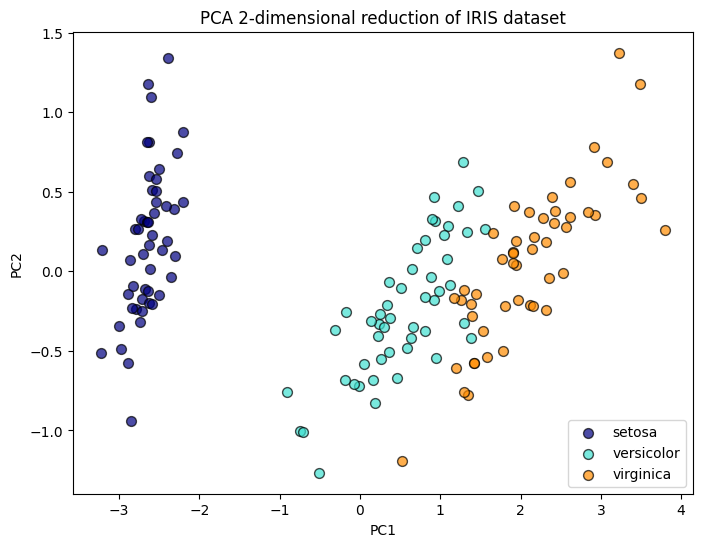

In [84]:
principal_directions_number=2
pca = PCA(n_components=principal_directions_number)
pca.fit(X)
X_pca = pca.transform(X)

components = pca.components_ # principal_directions_number of eigenvectors, in order of importance

pca.explained_variance_ratio_ 

plt.figure(figsize=(8,6))

colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=50, ec='k',alpha=0.7, lw=lw,
                label=target_name)

plt.title('PCA 2-dimensional reduction of IRIS dataset',)
plt.xlabel("PC1",)
plt.ylabel("PC2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
# plt.grid(True)
plt.show()

## t-SNE and UMAP

### from a built dataset D=3

In [8]:
centers = [ [ 2, -6, -6],
            [-1,  9,  4],
            [-8,  7,  2],
            [ 4,  7,  9] ]
cluster_std=[1,1,2,3.5]

# Make the blobs and return the data and the blob labels
X, labels_ = make_blobs(n_samples=500, centers=centers, n_features=3, cluster_std=cluster_std, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
# Create a DataFrame for Plotly
df = pd.DataFrame(X_scaled, columns=['X', 'Y', 'Z'])

# Create interactive 3D scatter plot
fig = px.scatter_3d(df, x='X', y='Y', z='Z', 
                    color=labels_.astype(str) ,  
                    opacity=0.7,  
                    color_discrete_sequence=px.colors.qualitative.G10, 
                    title="3D Scatter Plot of Four Blobs")

fig.update_traces(marker=dict(size=5, line=dict(width=1, color='black')), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800)  # Remove color bar, resize plot

fig.show()

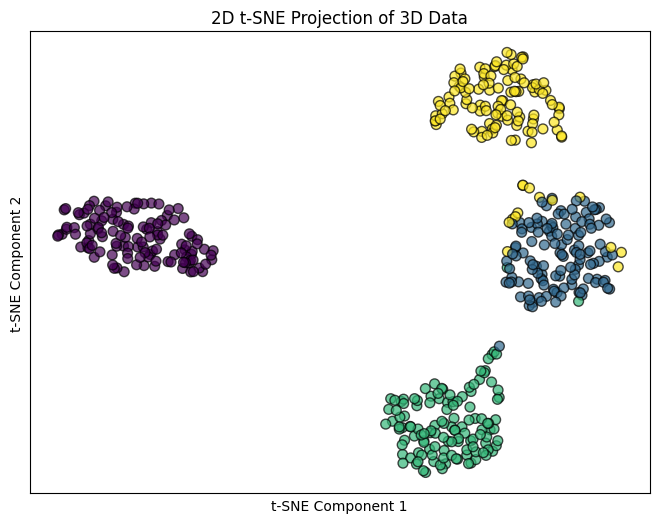

In [13]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax.set_title("2D t-SNE Projection of 3D Data")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



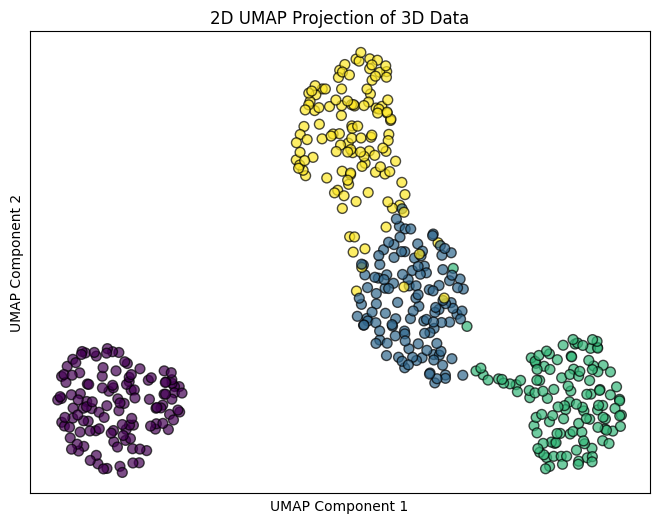

In [14]:
# Apply UMAP to reduce the dimensionality to 2D
umap_model = UMAP.UMAP(n_components=2, random_state=42, min_dist=0.5, spread=1,n_jobs=1)

X_umap = umap_model.fit_transform(X_scaled)

# Plot the 2D UMAP projection result 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

ax.set_title("2D UMAP Projection of 3D Data")
ax.set_xlabel("UMAP Component 1", )
ax.set_ylabel("UMAP Component 2", )
ax.set_xticks([])
ax.set_yticks([])
plt.show()

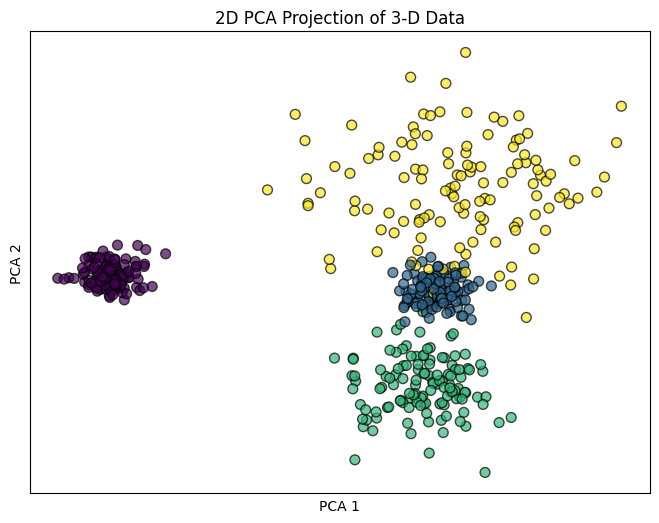

In [15]:
# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


fig = plt.figure(figsize=(8, 6))

# Plot the 2D PCA result (right)
ax2 = fig.add_subplot(111)
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax2.set_title("2D PCA Projection of 3-D Data")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()

# 9) Pipeline and cross-validation

In a scikit-learn Pipeline, each step has a name (e.g., imputer, scaler, classifier). If you want to set or change the parameters of a specific step, you do so by joining the step's name and the parameter name with a double underscore __. As an example, we create a pipeline
``` 
pipe = Pipeline([
                ('imputer', SimpleImputer()), 
                ('clf', RandomForestClassifier())
                ])
```
then we change the imputer strategy and number of trees using the double underscore
``` 
pipe.set_params(imputer__strategy='median')
pipe.set_params(clf__n_estimators=10)
``` 
and we can also replace a step
``` 
pipe.set_params(imputer=KNNImputer())
``` 
or skip a step
``` 
pipe.set_params(imputer='passthrough')  # or imputer=None
``` 

## simple pipeline

A pipeline for a scaler, a pca and a knn classifier at the end:

Test score: 0.9


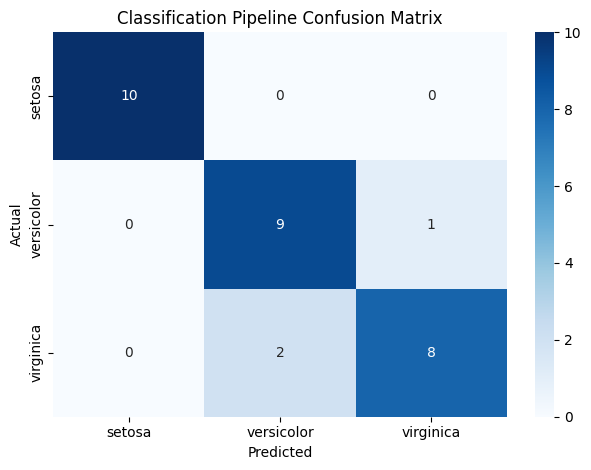

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [111]:
data = load_iris()
X, y = data.data, data.target
labels = data.target_names

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

input=[
    ('scaler', StandardScaler()),       # Step 1: Standardize features
    ('pca', PCA(n_components=2),),       # Step 2: Reduce dimensions to 2 using PCA
    ('knn', KNeighborsClassifier(n_neighbors=5))  # Step 3: K-Nearest Neighbors classifier
]

pipe=Pipeline(input)
pipe.fit(X_train, y_train)
yhat_test=pipe.predict(X_test)
test_score = pipe.score(X_test, y_test)
print('Test score:',test_score)

conf_matrix = confusion_matrix(y_test, yhat_test)
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('Classification Pipeline Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
plt.close()

print(classification_report(y_test,yhat_test))



Cross-validation and parameter tuning: we initialize a pipeline without any specification, which will be contained in the grid.

Parameters of the best model: {'knn__n_neighbors': 3, 'pca__n_components': 3} 

Test score with cross-validation: 0.9333333333333333


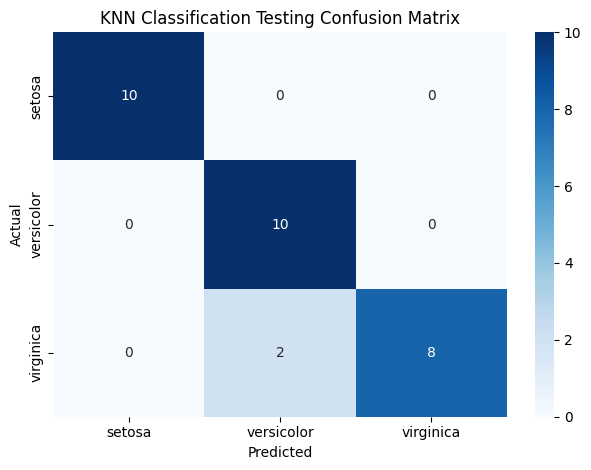

In [114]:
input=[
    ('scaler', StandardScaler()),       
    ('pca', PCA(),),      
    ('knn', KNeighborsClassifier())  
]
pipe=Pipeline(input)

parameters_grid = {'pca__n_components': [2, 3],
              'knn__n_neighbors': [3, 5, 7]
             }

cross_validation_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #To ensure the target is stratified

best_model = GridSearchCV(estimator=pipe,
                          param_grid=parameters_grid,
                          cv=cross_validation_method,
                          scoring='accuracy',
                          verbose=0 #insert higher value to get more info at each cycle of the greid search
                         )

best_model.fit(X_train, y_train)

print('Parameters of the best model:',best_model.best_params_,'\n') #parameters of the best model, in the form of a dict
print('Test score with cross-validation:',best_model.score(X_test,y_test))

yhat_test = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, yhat_test) #will be (rows,columns)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.title('KNN Classification Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
plt.close()